In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)
%matplotlib inline
columns=['id', 'host_id', 'host_since', 'host_is_superhost',  'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
         'latitude', 'longitude','property_type','room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews',
         'review_scores_rating']
listings=pd.read_csv('listings.csv.gz',usecols=columns)
listings['host_since']=pd.to_datetime(listings['host_since'])
listings['price']=listings.price.str.replace('$', '')
listings['price']=listings.price.str.replace(',','')
listings['price']=listings.price.astype(float)
listings.head(3)

,id,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood,neighbourhood_cleansed,city,zipcode,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
0,11156,40855,2009-09-23,f,1.0,Elizabeth Bay/Rushcutters Bay,Sydney,Potts Point,2011,-33.86917,151.22656,Apartment,Private room,1,64.0,2,180,364,196,92.0
1,12351,17061,2009-05-14,f,2.0,Pyrmont,Sydney,Pyrmont,2009,-33.86515,151.19190,Townhouse,Private room,2,14314.0,2,7,0,526,95.0
2,14250,55948,2009-11-20,t,2.0,Balgowlah,Manly,Balgowlah,2093,-33.80093,151.26172,House,Entire home/apt,6,471.0,5,22,173,2,90.0


In [168]:
listings.host_since.dtype
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36901 entries, 0 to 36900
Data columns (total 22 columns):
id                        36901 non-null int64
name                      36889 non-null object
host_id                   36901 non-null int64
host_name                 36894 non-null object
host_since                36894 non-null datetime64[ns]
host_is_superhost         36894 non-null object
host_listings_count       36894 non-null float64
neighbourhood             31769 non-null object
neighbourhood_cleansed    36901 non-null object
city                      36873 non-null object
zipcode                   36776 non-null object
latitude                  36901 non-null float64
longitude                 36901 non-null float64
property_type             36901 non-null object
room_type                 36901 non-null object
accommodates              36901 non-null int64
price                     36901 non-null float64
minimum_nights            36901 non-null int64
maximum_nights     

In [152]:
# listings.host_total_listings_count.unique()
# listings[['host_listings_count', 'host_total_listings_count']][]
# listings[['number_of_reviews', 'review_scores_rating']]
# # listings[listings['host_listings_count'] == listings['host_total_listings_count']].shape# listings.h# listings.host_since.min()
# listings.host_since.min()
# listings.host_since.max()
# listings.instant_bookable.value_counts()
# listings.shape
# listings['host_since'].dt.year
# listings.review_scores_rating.isnull().sum()
# listings.bed_type.value_counts()
# listings.price.dtypes
# listings.price.isnull().sum()
# listings.neighbourhood.unique()
# listings.neighbourhood_cleansed.isnull().sum()


In [216]:
host_id_count=listings.host_id.value_counts()
unique_hosts=len(host_id_count)
single_listings=host_id_count[host_id_count==1].count()
multi_listings=len(listings.host_id) - single_listings
len(listings.host_id), unique_hosts, multi_listings, single_listings

(36901, 26947, 13772, 23129)

In [217]:
listings.shape

(36901, 20)

In [170]:
listings.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'city', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')

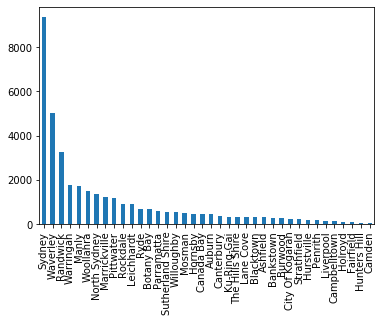

In [235]:
listings.neighbourhood_cleansed.unique()
listings.neighbourhood_cleansed.value_counts().plot(kind='bar')
